In [ ]:
#The aim of this project is to use several deep learning models
#to classify handwritten digits.

#Pattern recognition and image classification are challenging tasks in the field of machine learning.
#If we are classifying images, each pixel is considered to be a feature, meaning a 128 x 128 image
#has 16384 features. 

#In order for us to make image classification computationally possible, we have to reduce image
#quality, meaning a lot of information is lost. 

#Furthermore, there is usually no clear linear or non-linear relationship between features
#and the image, meaning we cannot apply linear or logistic regression or other similar models.

#Deep learning tends to be effective at image classification as the models are able to learn on the 
#intermediate representations of the object shown in the image through hidden layers and use them
#in the prediction process.

#In this project, we will analyse the effectiveness of deep, feedfoward neural networks at image
#classification.

In [1]:
#The dataset we will be looking at is a hand-written digits dataset, pre-loaded with the Scikit-learn
#library.
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [7]:
data_all = load_digits()
data_all.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
data = pd.DataFrame(data_all["data"])
target = pd.Series(data_all["target"])

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
target

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Length: 1797, dtype: int32

In [24]:
#The first row of our data stores pixel values for our first digit. 
#To visualise the image we need to reshape them back to the original size (8x8 pixels) and
#plot them on a coordinate grid.
second_image = data.iloc[1]
im = second_image.values
im = im.reshape(8,8)
im

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

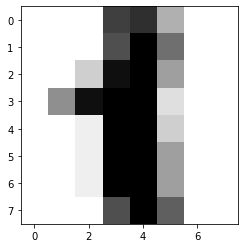

In [25]:
#Now we can visualise it
plt.imshow(im, cmap = "gray_r")

In [ ]:
#As we can see, the second digit in our dataset is 1.

In [ ]:
#Lets generate a 2 by 4 plot grid with different digits from the dataset.

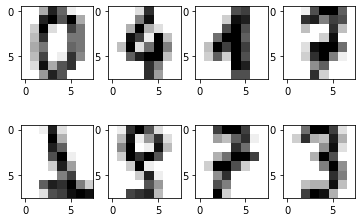

In [31]:
fig, ax = plt.subplots(2,4)
for i, j in zip(range(0,4), [0, 100, 200, 300]):
    ax[0,i].imshow(data.iloc[j].values.reshape(8,8), cmap = "gray_r")
    
for i, j in zip(range(0,4), [1000, 1100, 1200, 1300]):
    ax[1,i].imshow(data.iloc[j].values.reshape(8,8), cmap = "gray_r")    

In [36]:
#Before working with deep learning, first we can try accomplishing our task using the KNN algorithm.
#Unlike linear and logistic regression, k-nearest neighbors does not make any assumptions about
#the linearity of our data and instead focuses on comparing observations to the training set, 
#identifying similarities and giving the target entry the same label as the most simialr 
#entries in the training set.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
#Building a pipeline for testing and training knn models.

In [39]:
#The function trains a knn classification model with 4-fold cross validation, returning the mean
# evaluation score.
def knn_train_val(cols, target, neighbors = 5):
    knn = KNeighborsClassifier(n_neighbors= neighbors)
    cv_scores = cross_val_score(knn, cols, target, cv = 4)
    return cv_scores.mean()

In [40]:
knn_train_val(data, target)

0.9627233358079683

In [ ]:
#We can try different k values, to try to optimise the model performance

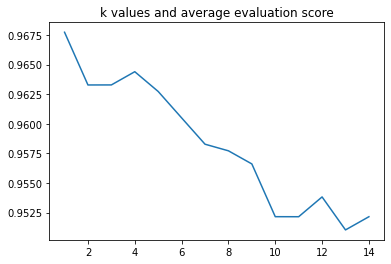

In [44]:
scores = []
k = list(range(1, 15))
for value in k:
    scores.append(knn_train_val(data, target, neighbors=value))
plt.title("k values and average evaluation score")
plt.plot(k, scores)

In [45]:
#looks like the model performs best with the k value of 1.
#Despite KNN performing quite well on this data, it is not very efficient as every new observation
#has to be compared to every entry in the training set.

In [ ]:
#We can now try using a neural network with a single hidden layer and compare the results.

In [55]:
from sklearn.neural_network import MLPClassifier

In [56]:
def MLP_train_val(cols, target, layers):
    mlp = MLPClassifier(hidden_layer_sizes=layers)
    cv_scores = cross_val_score(mlp, cols, target, cv = 4)
    return cv_scores.mean()

In [ ]:
#testing MLPClassifier using a hidden layer of 8, 16, 32, 64, 128, 256 neurons

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
layers = [(8,), (16,), (32,), (64,), (128,), (256,)]
scores = []
for entry in layers:
    scores.append(MLP_train_val(data, target, entry))

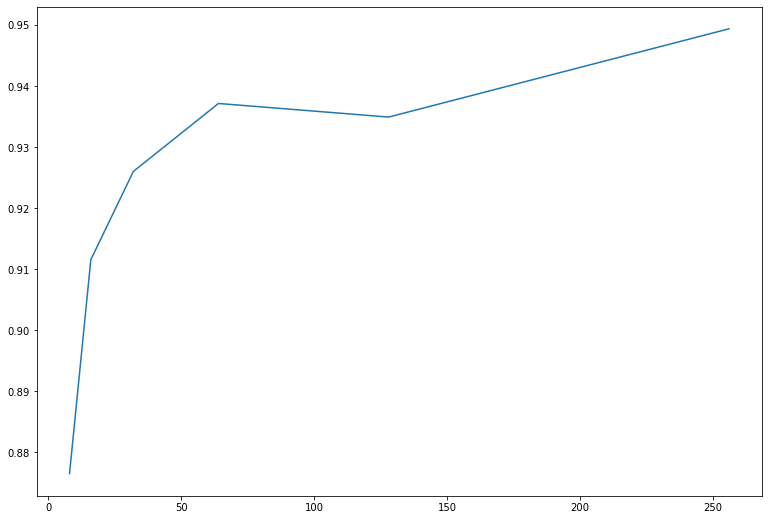

In [64]:
neurons = [i[0] for i in layers]
plt.figure(figsize =(13,9))
plt.plot(neurons, scores)

In [ ]:
#It looks like adding more neurons to a single hidden layer imporves accuracy to about 95%.
#Given that our KNN model was around 96% accurate on average, it looks like the model with a
#single hidden layer does not improve accuracy. 

#We can add another hidden layer and continue increasing the number of neurons in each layer.

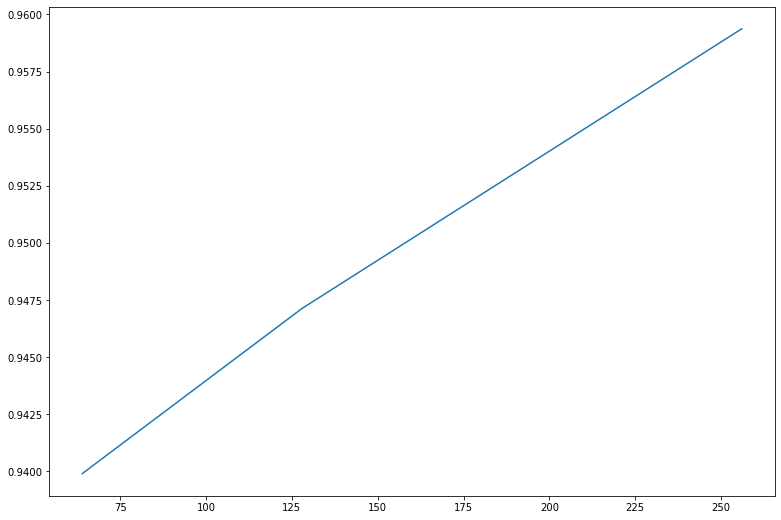

In [66]:
layers = [(64,64), (128,128), (256,256)]
scores = []
for entry in layers:
    scores.append(MLP_train_val(data, target, entry))
    
neurons = [i[0] for i in layers]
plt.figure(figsize =(13,9))
plt.plot(neurons, scores)    

In [ ]:
#The model with 2 hidden layers seems to perform just a bit better, with accuracy of around 96%.
#At this point, overfitting may be a problem, as the model is becoming more and more complex.
#We can increase the number of folds in k-fold cross validation to help us prevent overfitting.

In [ ]:
#Updated model has 3 hidden layers, with the pipeline using 6 folds in cross validation.

In [67]:
def MLP_train_val(cols, target, layers):
    mlp = MLPClassifier(hidden_layer_sizes=layers)
    cv_scores = cross_val_score(mlp, cols, target, cv = 6)
    return cv_scores.mean()

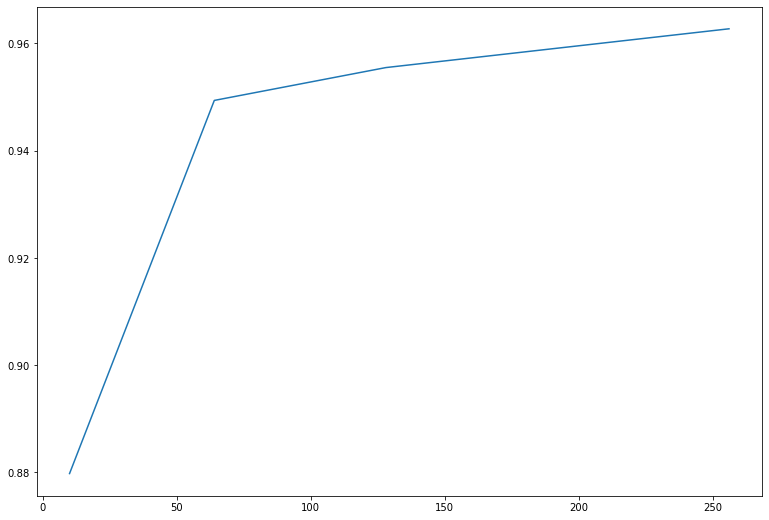

In [68]:
layers = [(10,10,10), (64,64,64), (128,128,128), (256,256,256)]
scores = []
for entry in layers:
    scores.append(MLP_train_val(data, target, entry))
    
neurons = [i[0] for i in layers]
plt.figure(figsize =(13,9))
plt.plot(neurons, scores)    

In [69]:
scores

[0.8797956150130063, 0.9493571163136382, 0.955479375696767, 0.9627090301003345]

In [ ]:
#We see no improvents in accuracy of the 3 hidden layer model.
#Those results are less optimistic because we used more folds in the cross validation to account
#for potential overfitting.

In [ ]:
#The default MLPClassifier uses the 'ReLU' activation function. 
#We can check if other activation functions perform better in this case.

In [70]:
def MLP_train_val(cols, target, layers, activation_f):
    mlp = MLPClassifier(hidden_layer_sizes=layers, activation = activation_f )
    cv_scores = cross_val_score(mlp, cols, target, cv = 6)
    return cv_scores.mean()

In [71]:
scores = {}
activation = ["identity", "logistic", "tanh", "relu"]
for func in activation:
    scores[func] = MLP_train_val(data, target, layers = (256,256,256), activation_f = func)
scores    

{'identity': 0.9298940914158306,
 'logistic': 0.949362690449647,
 'tanh': 0.9621497584541063,
 'relu': 0.9632683017465626}

In [ ]:
#It looks like the default activation function produces the most accurate predictions.